<a href="https://colab.research.google.com/github/Milikitty/visualization/blob/main/EDA_and_Visualization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


In [ ]:
#Q4 is the one chosen. This is worldwide suicide mortality data from the WHO from 1950 to 2021

#1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/age_std_suicide_rates_1990-2022.csv')
print(df.head(5))

  RegionCode RegionName CountryCode CountryName  Year     Sex  SuicideCount  \
0         EU     Europe         ALB     Albania  1992    Male            33   
1         EU     Europe         ALB     Albania  1992  Female            14   
2         EU     Europe         ALB     Albania  1993    Male            46   
3         EU     Europe         ALB     Albania  1993  Female            27   
4         EU     Europe         ALB     Albania  1994    Male            37   

   CauseSpecificDeathPercentage  StdDeathRate  DeathRatePer100K  Population  \
0                      0.331959      2.335802          2.076386   3247039.0   
1                      0.191860      0.866420          0.874563   3247039.0   
2                      0.477724      3.330938          2.937233   3227287.0   
3                      0.385164      1.755077          1.686025   3227287.0   
4                      0.419406      2.678796          2.332619   3207536.0   

            GDP  GDPPerCapita           GNI  GNIPe

2) Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

No. It does not show how the missings are handled. For the missing values, there's simply blanks where there are no values. It does not really describe the missing values or the missing value codes. The data does not really seem to describe how the missing values are handled in any way shape or form. The data overall however is clean, well maintained, though the missing data is a bit of a eyesore and a thing that I would wonder how to handle.



#3) Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

#Some of the interesting variables are the Inflation rate, GINI, and employment population ratio. This is because sure it's easy to see if poverty comes with a higher suicide rate. But what about inflation and the feeling of relative poverty and deprivation?

In [30]:
#3)
# Include 'CauseSpecificDeathPercentage' when reading the CSV
df = pd.read_csv('/content/age_std_suicide_rates_1990-2022.csv', usecols = ['GNI','InflationRate', 'EmploymentPopulationRatio', 'CauseSpecificDeathPercentage'])
print(df.head(5))

#This portion drops 296 rows that have a lot of data that is missing 5 or more columns worth of data being analyzed such as GINI, Infltion, and employment
df.dropna(thresh=len(df.columns) -5, inplace=True)
print(df.head(5))

#This portion drops rows that have either of the three critical variables missing
# Removing inplace=True as it modifies the DataFrame in place and returns None
df_cleaned = df.dropna(subset=['GNI', 'InflationRate', 'EmploymentPopulationRatio','CauseSpecificDeathPercentage'])
print(df.head(5))

#This portion cleans out any duplicates
df_cleaned.drop_duplicates(inplace=True)

#This portion changes the variable names for easier sharing
df_cleaned.rename(columns={'GNI': 'Gini', 'InflationRate': 'Inflation_Rate', 'EmploymentPopulationRatio': 'Employment_Population_Ratio', 'CauseSpecificDeathPercentage':'Suicide_Percentage'}, inplace=True)
print(df.head(5))

#The trend I see is that there tends to be a wide range in GINI and INflation rates between countries
#Trying to represent all of GINI and Inflation is difficult to do in one boxplot
#I see a some outliers

   CauseSpecificDeathPercentage           GNI  InflationRate  \
0                      0.331959  9.061842e+08     226.005421   
1                      0.191860  9.061842e+08     226.005421   
2                      0.477724  1.024263e+09      85.004751   
3                      0.385164  1.024263e+09      85.004751   
4                      0.419406  1.216681e+09      22.565053   

   EmploymentPopulationRatio  
0                     45.315  
1                     45.315  
2                     47.798  
3                     47.798  
4                     50.086  
   CauseSpecificDeathPercentage           GNI  InflationRate  \
0                      0.331959  9.061842e+08     226.005421   
1                      0.191860  9.061842e+08     226.005421   
2                      0.477724  1.024263e+09      85.004751   
3                      0.385164  1.024263e+09      85.004751   
4                      0.419406  1.216681e+09      22.565053   

   EmploymentPopulationRatio  
0            

<ipython-input-30-4bdacd3a8610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)
<ipython-input-30-4bdacd3a8610>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'GNI': 'Gini', 'InflationRate': 'Inflation_Rate', 'EmploymentPopulationRatio': 'Employment_Population_Ratio', 'CauseSpecificDeathPercentage':'Suicide_Percentage'}, inplace=True)


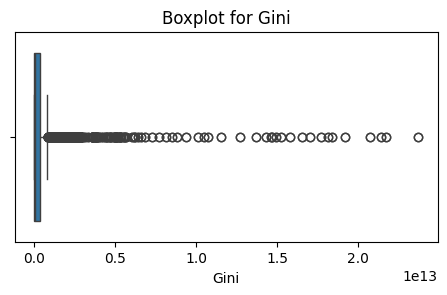

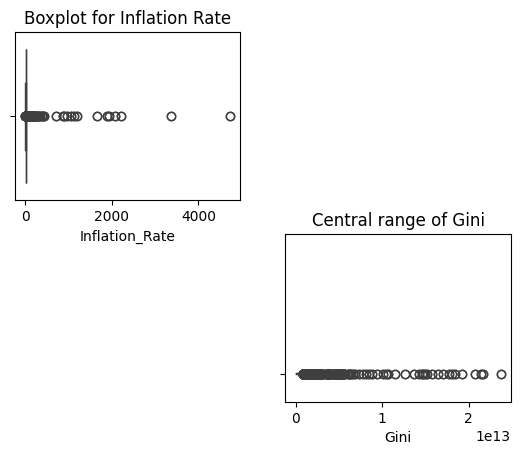

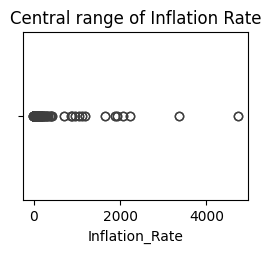

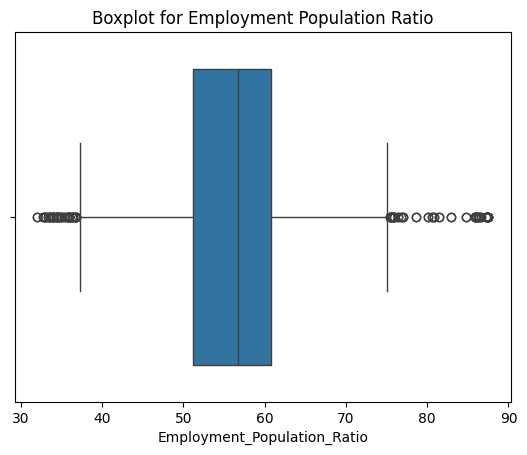

In [31]:
#4 Create a boxplot for each numerical variable

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))

#full boxplot for GINI
plt.subplot(2,2,3)
plt.title('Boxplot for Gini')
sns.boxplot(x=df_cleaned['Gini'])
plt.show()

#zoomed in boxplot for GINI
plt.subplot(2,2,4)
plt.title('Central range of Gini')
sns.boxplot(x=df_cleaned['Gini'])
plt.ylim([-20, 100])

#full boxplot for inflation rate
plt.subplot(2,2,1)
plt.title('Boxplot for Inflation Rate')
sns.boxplot(x=df_cleaned['Inflation_Rate'])
plt.show()

#zoomed in boxplot for inflation rate
plt.subplot(2,2,2)
plt.title('Central range of Inflation Rate')
sns.boxplot(x=df_cleaned['Inflation_Rate'])
plt.ylim([-20, 20])
plt.show()

plt.title('Boxplot for Employment Population Ratio')
sns.boxplot(x=df_cleaned['Employment_Population_Ratio'])
plt.show()

#The trend I see is that there tends to be a wide range in GINI and INflation rates between countries
#Trying to represent all of GINI and Inflation is difficult to do in one boxplot
#I see some outliers such as inflation over 4000 percent

<ipython-input-32-dd239a4ea6cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log_Gini'] = np.log(df_cleaned['Gini'])


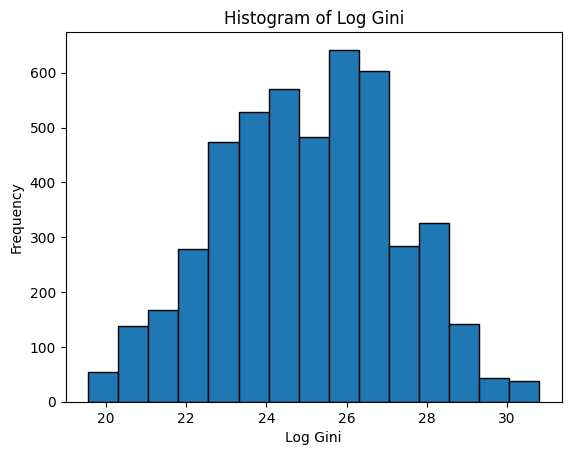

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-32-dd239a4ea6cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log_Inflation_Rate'] = np.log(df_cleaned['Inflation_Rate'])


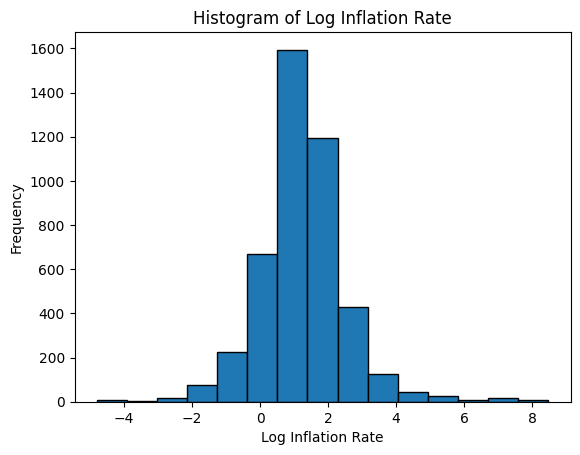

<ipython-input-32-dd239a4ea6cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log_Employment_Population_Ratio'] = np.log(df_cleaned['Employment_Population_Ratio'])


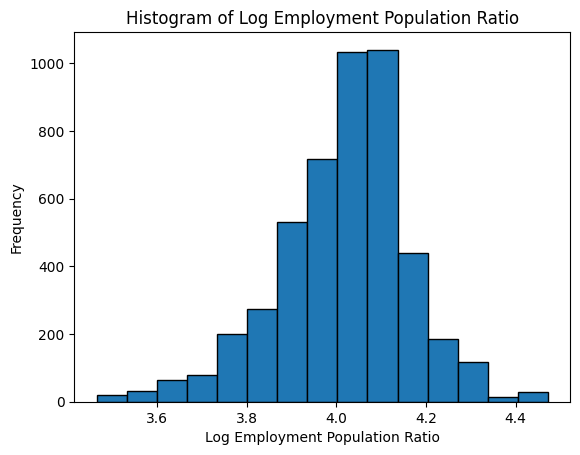

In [32]:
#5) Transforming data with severe outliers histograms. Utilize log transformations for GINI and Inflation
df_cleaned['Log_Gini'] = np.log(df_cleaned['Gini'])
plt.hist(df_cleaned['Log_Gini'], bins=15, edgecolor = 'black')
plt.xlabel('Log Gini')
plt.ylabel('Frequency')
plt.title('Histogram of Log Gini')
plt.show()

df_cleaned['Log_Inflation_Rate'] = np.log(df_cleaned['Inflation_Rate'])
plt.hist(df_cleaned['Log_Inflation_Rate'], bins=15, edgecolor = 'black')
plt.xlabel('Log Inflation Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Log Inflation Rate')
plt.show()

df_cleaned['Log_Employment_Population_Ratio'] = np.log(df_cleaned['Employment_Population_Ratio'])
plt.hist(df_cleaned['Log_Employment_Population_Ratio'], bins=15, edgecolor = 'black')
plt.xlabel('Log Employment Population Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Log Employment Population Ratio')
plt.show()

#Log transformations to make the graphs cleaner

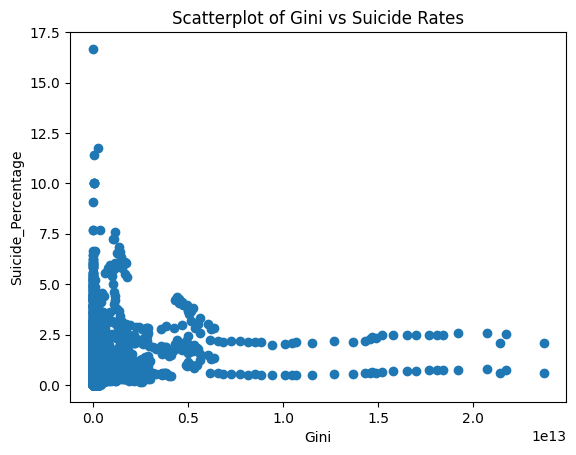

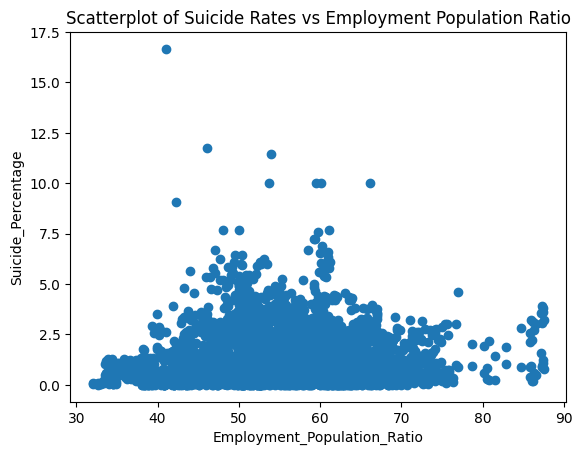

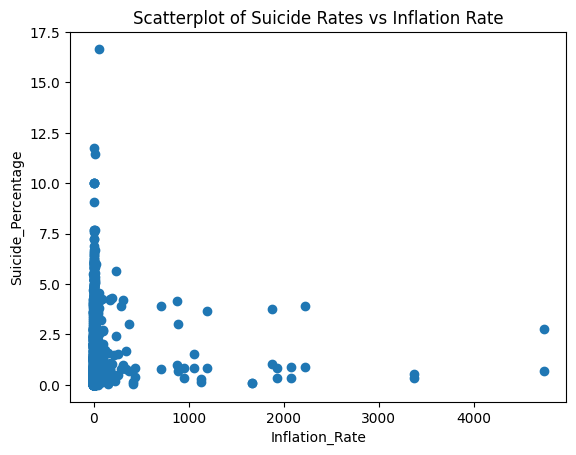

In [35]:
#6) Scatter plots

plt.scatter(df_cleaned['Gini'], df_cleaned['Suicide_Percentage'])
plt.xlabel('Gini')
plt.ylabel('Suicide_Percentage')
plt.title('Scatterplot of Gini vs Suicide Rates')
plt.show()

plt.scatter(df_cleaned['Employment_Population_Ratio'], df_cleaned['Suicide_Percentage'])
plt.xlabel('Employment_Population_Ratio')
plt.ylabel('Suicide_Percentage')
plt.title('Scatterplot of Suicide Rates vs Employment Population Ratio')
plt.show()

plt.scatter(df_cleaned['Inflation_Rate'], df_cleaned['Suicide_Percentage'])
plt.xlabel('Inflation_Rate')
plt.ylabel('Suicide_Percentage')
plt.title('Scatterplot of Suicide Rates vs Inflation Rate')
plt.show()

#Lowest GINI is correlated with the higher suicide rates. But the overall relationship seems to follow a slightly logarithmic pattern but it's interesting how there's almost like two tracks
#The center of employment rates seem to have higher rates of suicide
#The highest suicide rates are not where the highest inflation rates are

In [37]:
#7) Create a table for 5 number summary
df.describe()
#There's an economic link between economic measures and suicide rates but it lso seems to be more dependent on the change
#Change in economic states seem to matter more than a static data point

,CauseSpecificDeathPercentage,GNI,InflationRate,EmploymentPopulationRatio
count,5927.000000,5.430000e+03,5205.000000,5372.000000
mean,1.264219,4.975887e+11,20.286455,55.750811
std,1.188728,1.688950e+12,163.114790,8.141714
min,0.000000,2.082832e+08,-10.630097,32.026000
25%,0.431064,1.176850e+10,1.498961,50.791000
50%,0.882576,5.987715e+10,3.038888,56.021000
75%,1.870304,3.055000e+11,6.536199,60.415250
max,16.666667,2.370000e+13,4734.914347,87.518000
